### Task 3

In [1]:
import pathlib
import matplotlib.pyplot as plt
import utils
from torch import nn
from dataloaders import load_cifar10
from trainer import Trainer, compute_loss_and_accuracy

In [2]:
class Task3Model(nn.Module):

    def __init__(self, image_channels, num_classes):
        
        super().__init__()
        
        self.num_classes = num_classes
        
        # Define the convolutional layers
        self.feature_extractor = nn.Sequential(
             
            nn.Conv2d(
                in_channels=image_channels,
                out_channels=16,
                kernel_size=3,
                stride=1,
                padding=0
            ),
            nn.LeakyReLU(),
            
            nn.Conv2d(
                in_channels=16,
                out_channels=32,
                kernel_size=3,
                stride=1,
                padding=0
            ),
            nn.LeakyReLU(),

            nn.MaxPool2d(
                [2,2],
                stride=2
            ), 
             
            nn.Conv2d(
                in_channels=32,
                out_channels=64,
                kernel_size=3,
                stride=1,
                padding=0
            ),
            nn.LeakyReLU(),

            nn.Conv2d(
                in_channels=64,
                out_channels=128,
                kernel_size=3,
                stride=1,
                padding=0
            ),
            nn.LeakyReLU(),

            nn.MaxPool2d(
                [2,2],
                stride=2
            ),
        ) 

   
        self.num_output_features = 5*5*128
        self.num_hidden_units = 64
   
        # __ Layer 4 __
        self.classifier = nn.Sequential(
            #Fully connected 64 
            nn.Linear(self.num_output_features, self.num_hidden_units),
            #Activation ReLU
            nn.LeakyReLU(),
            #Fully connected 10
            nn.Linear(self.num_hidden_units, num_classes)
        )

    def forward(self, x):
        
        batch_size = x.shape[0]
        x = self.feature_extractor(x)
        x = x.view(-1,self.num_output_features) # view(batch_size,-1) instead??
        x = self.classifier(x)
        
        out = x

        expected_shape = (batch_size, self.num_classes)
        
        assert out.shape == (batch_size, self.num_classes),\
            f"Expected output of forward pass to be: {expected_shape}, but got: {out.shape}"
        return out

In [3]:
def create_plots(trainer: Trainer, name: str):
    plot_path = pathlib.Path("plots")
    plot_path.mkdir(exist_ok=True)
    # Save plots and show them
    plt.figure(figsize=(20, 8))
    plt.subplot(1, 2, 1)
    plt.grid()
    plt.title("Cross Entropy Loss")
    utils.plot_loss(trainer.train_history["loss"], label="Training loss", npoints_to_average=10)
    utils.plot_loss(trainer.validation_history["loss"], label="Validation loss")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.title("Accuracy")
    plt.grid()
    utils.plot_loss(trainer.validation_history["accuracy"], label="Validation Accuracy")
    plt.legend()
    plt.savefig(plot_path.joinpath(f"{name}_plot.png"))
    plt.show()

In [4]:
utils.set_seed(0)
epochs = 10
batch_size = 64
learning_rate = 2e-2
early_stop_count = 4
dataloaders = load_cifar10(batch_size)
model = Task3Model(image_channels=3, num_classes=10)
optimizer = "sgd"
trainer = Trainer(
    batch_size,
    learning_rate,
    early_stop_count,
    epochs,
    model,
    dataloaders,
    optimizer
)
trainer.train()


Files already downloaded and verified
Files already downloaded and verified
Task3Model(
  (feature_extractor): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): LeakyReLU(negative_slope=0.01)
    (2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (3): LeakyReLU(negative_slope=0.01)
    (4): MaxPool2d(kernel_size=[2, 2], stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (6): LeakyReLU(negative_slope=0.01)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (8): LeakyReLU(negative_slope=0.01)
    (9): MaxPool2d(kernel_size=[2, 2], stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=3200, out_features=64, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=64, out_features=10, bias=True)
  )
)
Epoch: 0, Batches per seconds: 105.00, Global step:    351, Validation Loss: 35.09, Validation Accuracy

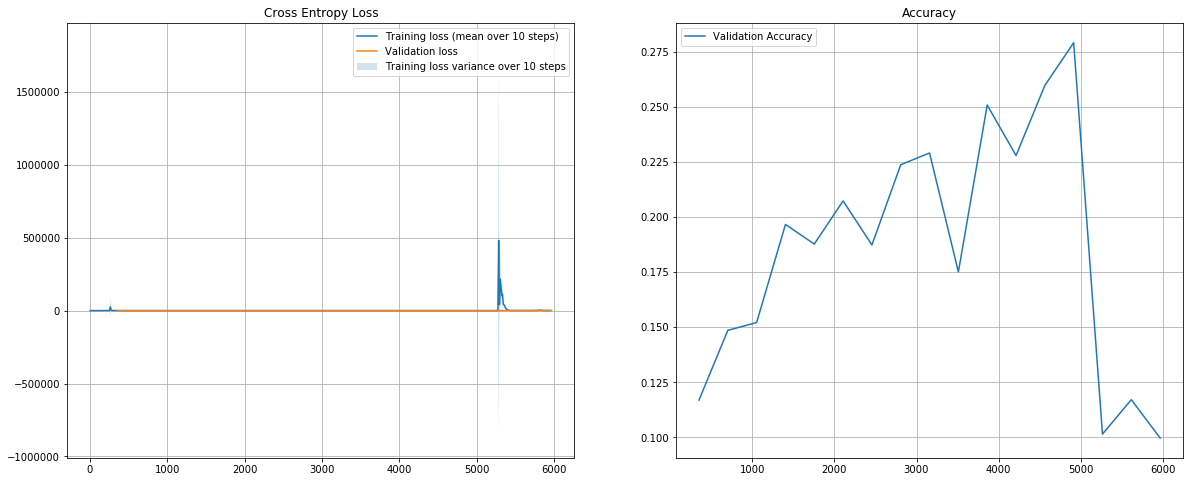

In [5]:
create_plots(trainer, "task3")

In [6]:
training_loss, training_accuracy = compute_loss_and_accuracy(trainer.dataloader_train, trainer.model, trainer.loss_criterion)
validation_loss, validation_accuracy = compute_loss_and_accuracy(trainer.dataloader_val, trainer.model, trainer.loss_criterion)
test_loss, test_accuracy = compute_loss_and_accuracy(trainer.dataloader_test, trainer.model, trainer.loss_criterion)
print(f"  Training: Accuracy: {training_accuracy}, Loss: {training_loss}")
print(f"Validation: Accuracy: {validation_accuracy}, Loss: {validation_loss}")
print(f"      Test: Accuracy: {test_accuracy}, Loss: {test_loss}")


  Training: Accuracy: 0.09992887824773788, Loss: 909.6781616210938
Validation: Accuracy: 0.09968354552984238, Loss: 915.9286499023438
      Test: Accuracy: 0.09932325035333633, Loss: 906.5629272460938
